In [ ]:
!pip install better-profanity
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
#Importing neccessary dependencies
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from datetime import datetime
from better_profanity import profanity
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [ ]:
#Read and load the dataset which is necessary for processing task and data analysis.
df = pd.read_csv('/content/tweets.csv')
print("data shape is :",df.shape)
print("\n Show top 10 records")
df.head(10)

data shape is : (50001, 6)

 Show top 10 records


,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0
5,5,2023-03-29 15:21:29+00:00,FreeMindKeenEye,@IAMCouncil @POTUS @Ilhan @bridgeinit OK this ...,0.0,0.0
6,6,2023-03-29 15:20:41+00:00,SamsSamsson6,@darrengrimes_ Why are pakistani /indian dual ...,0.0,0.0
7,7,2023-03-29 15:20:16+00:00,SamsSamsson6,@PeterStefanovi2 Why are pakistani /indian dua...,0.0,0.0
8,8,2023-03-29 15:19:44+00:00,SamsSamsson6,Why are pakistani /indian dual nationals allow...,0.0,0.0
9,9,2023-03-29 15:19:32+00:00,ncsukumar1,@BesuraTaansane @KartiPC @PChidambaram_IN The ...,0.0,0.0


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Date,0
User,0
Tweet,1
Likes,2
Retweets,2


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
print('length of data is',len(df))

length of data is 49999


In [ ]:
df.shape

(49999, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49999 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49999 non-null  object 
 1   Date        49999 non-null  object 
 2   User        49999 non-null  object 
 3   Tweet       49999 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.7+ MB


In [ ]:
df.dtypes

,0
Unnamed: 0,object
Date,object
User,object
Tweet,object
Likes,float64
Retweets,float64


In [ ]:
df.nunique()

,0
Unnamed: 0,49999
Date,49820
User,35108
Tweet,49568
Likes,598
Retweets,312


In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'User', 'Tweet', 'Likes', 'Retweets'], dtype='object')

In [ ]:
df['User'].unique()

array(['AnandPatni8', 'dhinamum', 'PrincetonCGI', ..., 'Dan_T129',
       'shivashan_', 'Amateure_trader'], dtype=object)

In [ ]:
df['Tweet'].unique()

array(["@vinodkapri @RahulGandhi Respected Indian Citizens, Namaskaar🙏I am the original Gandhi. I have no branches or franchises. None of my relatives are in politics. Beware of fake Gandhi's. Take care🙏 Mohandas Karamchand Gandhi.",
       "*Respected Indian Citizens,* Namaskaar I Am The Original Gandhi. I Have No Branches Or Franchises. None Of My Relatives Are In Politics. Beware Of Fake Gandhi's. Take Care,,,_ https://t.co/0OFay52fqP",
       '1/n-Meet Filmmaker Prakash Jha in New Jersey talking on Social Justice,Power,&amp;Politics in Indian Cinema @Princeton University(April 11-28,2023) Artist-In-Residence@PrincetonCGI.See full program https://t.co/tDkpIv03Z0\n@PrincetonPubLec @PrincetonHum @PrincetonPIIRS @PJP_Online https://t.co/RMcBwf64Qx',
       ...,
       '@Schandillia A true leader puts the team in front during success. And during failure accepts the blame on himself. \n\nUNO 🔁 reverse in Indian politics.',
       "Now' Rahul Gandhi is Mahanayak of\nINDIA. Regarding Bhara

In [ ]:
df['User'].nunique()

35108

In [ ]:
data = df[['User','Tweet']]

In [ ]:
#to analysis the twitter data positive,negative and neutral.
data_pos = data[data['User']==1]
data_neg = data[data['User']==0]

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

In [ ]:
print('columns in the data is:', len(df.columns))
print('rows in the data is:',len(df))

columns in the data is: 6
rows in the data is: 49999


In [ ]:
#data preprocessing.
df['Original_Tweet']=df['Tweet']
df['DateTime'] = df['Date']
df = df.drop('Date', axis=1)
df['DateTime'] = df['DateTime'].astype(str).apply(lambda x: x.split('+')[0])
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce', format='%Y-%m-%d %H:%M:%S').fillna(pd.Timestamp('1900-01-01'))
df['date'] = df.DateTime.apply(lambda x: x.date())
df['month'] = df.DateTime.apply(lambda x: x.month)
df['year'] = df.DateTime.apply(lambda x: x.year)
df['hour'] = df.DateTime.apply(lambda x: x.hour)
df.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15


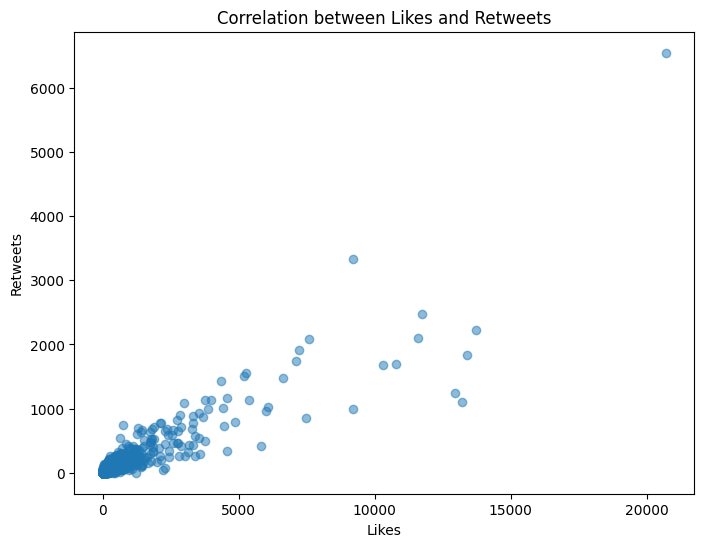

In [ ]:
# @title Correlation between Likes and Retweets

import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'

plt.figure(figsize=(8, 6))
plt.scatter(df['Likes'], df['Retweets'], alpha=0.5)
plt.title('Correlation between Likes and Retweets')
plt.xlabel('Likes')
_ = plt.ylabel('Retweets')


In [ ]:
#By using Data preprocessing method such as Clean tweet, tokenization and text normalization.

stop_words = stopwords.words('english')

def clean_tweet(tweet):
    # convert to lower case
    tweet = tweet.lower()

    # censor profanity
    profanity.load_censor_words()
    tweet = profanity.censor(tweet)

    # remove twitter handlers
    tweet = re.sub('@[^\s]+', '', tweet)

    # remove hashtags
    tweet = re.sub(r'\B#\S+', '', tweet)

    # remove urls
    tweet = re.sub(r"http\S+", "", tweet)

    # remove special characters and punctuations
    tweet = re.sub(r'\W', ' ', tweet)

    # remove single characters except for 'a' and 'i'
    tweet = re.sub(r'\s+[a-hj-z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+i\s+', ' I ', tweet)
    tweet = re.sub(r'\s+a\s+', ' a ', tweet)

    # substitute multiple spaces with single space
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)

    # remove stop words
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

    return tweet

In [ ]:
#Applying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['Tweet']= dataset['Tweet'].apply(lambda x: stemming_on_text(x))
dataset['Tweet'].head()

,Tweet


In [ ]:
#Applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['Tweet'].head()

,Tweet


In [ ]:
# df = df.sample(n=1000, replace=True)
# df=df.head(100)

# df.shape

In [ ]:
df.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15


In [ ]:
#sentiment analysis using textblob
#textblob are a part of aentiment analysis library and this library classify tweets as positive negative and neutral.
#Another sentiment analysis is polarity scoring which assign this to quantify the sentiment strength.

sentiment_objects = [TextBlob(tweet) for tweet in df['Tweet']]

# Create a list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]


# Create a dataframe of each tweet against its polarity
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

df['Polarity']=sentiment_df['polarity']

In [ ]:
# Create the new column using a lambda function and apply() to classify the tweets as Positive, Negative, or Neutral.
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [ ]:
df.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour,Polarity,Sentiment
0,0,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15,-0.062500,Negative
1,1,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15,-0.062500,Negative
2,2,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15,0.173232,Positive
3,3,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15,0.000000,Neutral
4,4,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15,0.214286,Positive


In [ ]:
#seperating input feature and label
X=data.Tweet
y=data.User

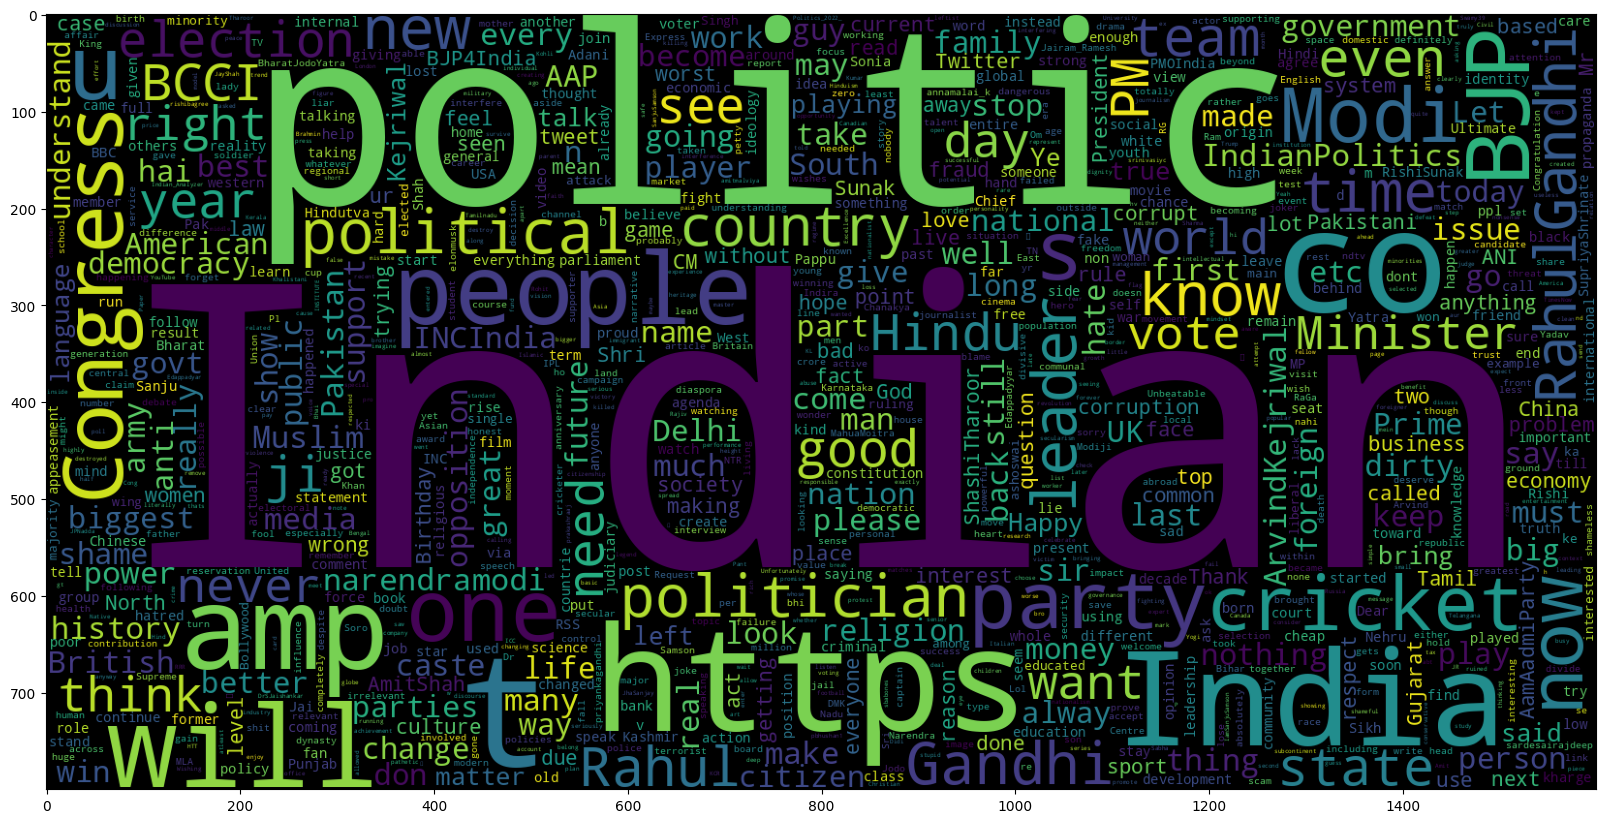

In [ ]:
#Plot a cloud words for negative tweets
data_neg = data['Tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

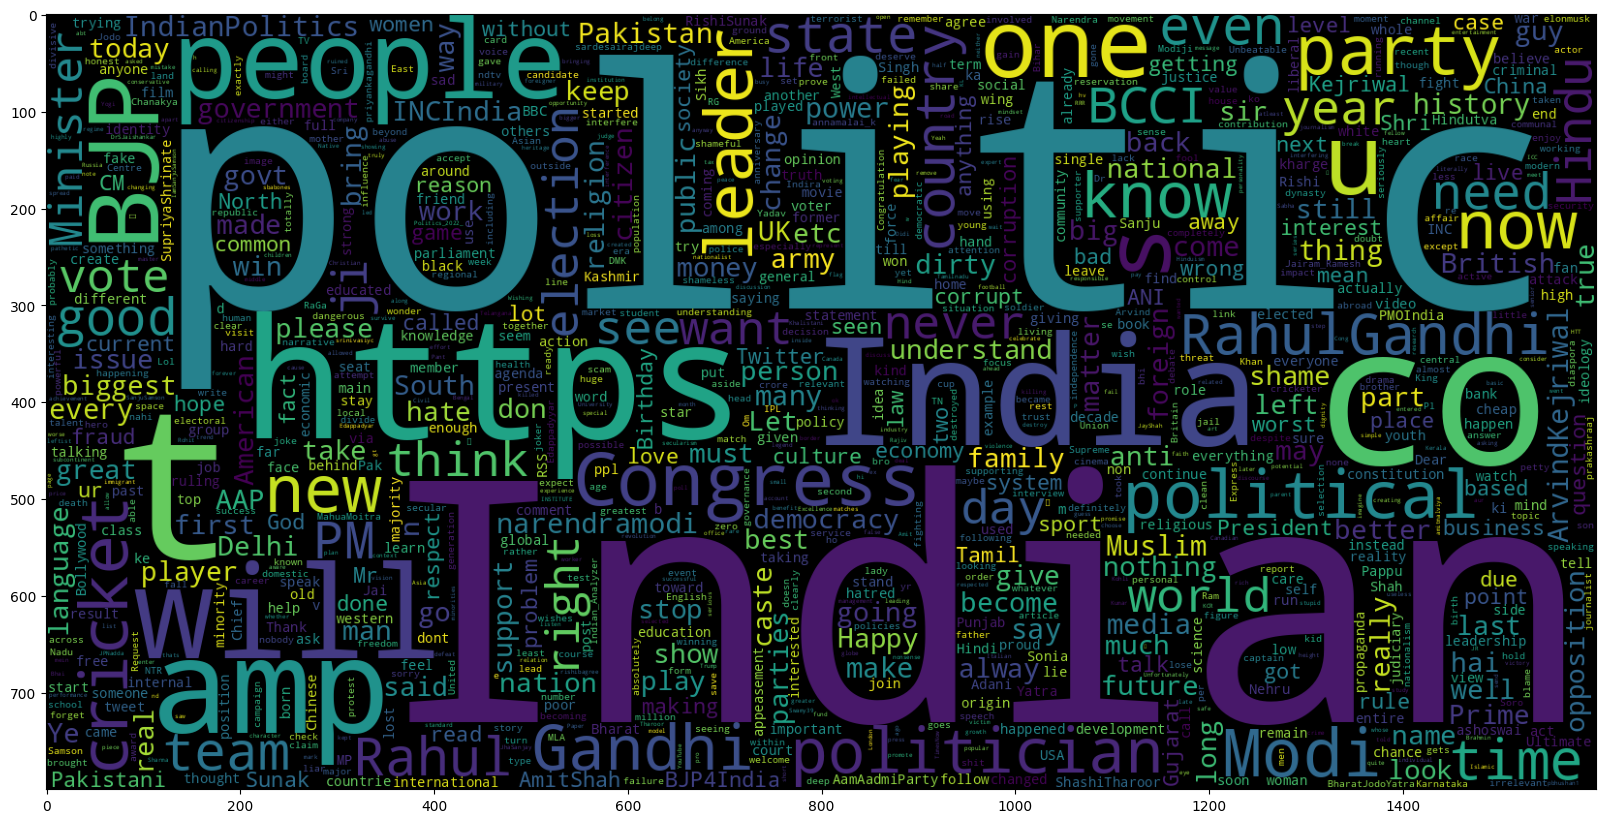

In [ ]:
#Plot a cloud words for positive tweets
data_pos = data['Tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

In [ ]:
#Model Training Dataset
train_df = pd.read_csv('/content/tweets.csv')

# Load the validation dataset
val_df = pd.read_csv('/content/tweets.csv')

# Display the first few rows of the training dataset
print(train_df.head(10))

  Unnamed: 0                       Date             User  \
0          0  2023-03-29 15:42:36+00:00      AnandPatni8   
1          1  2023-03-29 15:42:05+00:00         dhinamum   
2          2  2023-03-29 15:34:29+00:00     PrincetonCGI   
3          3  2023-03-29 15:31:43+00:00     RishiJoeSanu   
4          4  2023-03-29 15:26:48+00:00     itweetsensee   
5          5  2023-03-29 15:21:29+00:00  FreeMindKeenEye   
6          6  2023-03-29 15:20:41+00:00     SamsSamsson6   
7          7  2023-03-29 15:20:16+00:00     SamsSamsson6   
8          8  2023-03-29 15:19:44+00:00     SamsSamsson6   
9          9  2023-03-29 15:19:32+00:00       ncsukumar1   

                                               Tweet  Likes  Retweets  
0  @vinodkapri @RahulGandhi Respected Indian Citi...    0.0       0.0  
1  *Respected Indian Citizens,* Namaskaar I Am Th...    0.0       0.0  
2  1/n-Meet Filmmaker Prakash Jha in New Jersey t...    0.0       0.0  
3  @MrinalWahal Why would politicians stop using ..

In [ ]:
#To find the basics statitics.
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

(50001, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50001 non-null  object 
 1   Date        50001 non-null  object 
 2   User        50001 non-null  object 
 3   Tweet       50000 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.3+ MB
None
              Likes      Retweets
count  49999.000000  49999.000000
mean      16.213384      3.594672
std      243.116572     53.452615
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        2.000000      0.000000
max    20716.000000   6551.000000


In [ ]:
train_df.columns = ['Unnamed: 0', 'Date', 'User', 'Tweet', 'Likes', 'Retweets']
print(train_df.describe())

              Likes      Retweets
count  49999.000000  49999.000000
mean      16.213384      3.594672
std      243.116572     53.452615
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        2.000000      0.000000
max    20716.000000   6551.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'User', 'Tweet', 'Likes', 'Retweets', 'Original_Tweet',
       'DateTime', 'date', 'month', 'year', 'hour', 'Polarity', 'Sentiment'],
      dtype='object')

In [ ]:
train_df = train_df.dropna(subset=['Tweet'])
sentiment_counts = train_df['Retweets'].value_counts()
print(sentiment_counts)

Retweets
0.0      40841
1.0       3883
2.0       1267
3.0        649
4.0        417
         ...  
186.0        1
216.0        1
215.0        1
133.0        1
444.0        1
Name: count, Length: 312, dtype: int64


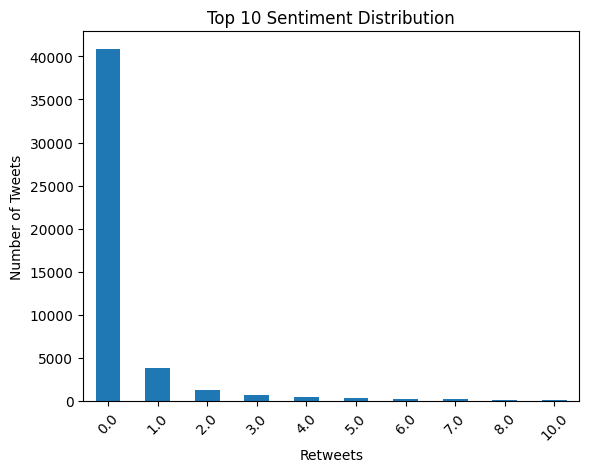

In [ ]:
sentiment_counts = train_df['Retweets'].value_counts().head(10)
sentiment_counts.plot(kind='bar')
plt.title('Top 10 Sentiment Distribution')
plt.xlabel('Retweets')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

In [ ]:
train_df['cleaned_text'] = train_df['Tweet'].str.lower()

In [ ]:
import re

def remove_mentions_hashtags(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    return text

train_df['cleaned_text'] = train_df['cleaned_text'].apply(remove_mentions_hashtags)

In [ ]:
def remove_urls(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    return text

train_df['cleaned_text'] = train_df['cleaned_text'].apply(remove_urls)

In [ ]:
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

train_df['cleaned_text'] = train_df['cleaned_text'].apply(remove_punctuation)

In [ ]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

train_df['cleaned_text'] = train_df['cleaned_text'].apply(remove_numbers)

In [ ]:
print(train_df[['Tweet', 'cleaned_text']].head())

                                               Tweet  \
0  @vinodkapri @RahulGandhi Respected Indian Citi...   
1  *Respected Indian Citizens,* Namaskaar I Am Th...   
2  1/n-Meet Filmmaker Prakash Jha in New Jersey t...   
3  @MrinalWahal Why would politicians stop using ...   
4  @annamalai_k @narendramodi A state level presi...   

                                        cleaned_text  
0    respected indian citizens namaskaari am the ...  
1  respected indian citizens namaskaar i am the o...  
2  nmeet filmmaker prakash jha in new jersey talk...  
3   why would politicians stop using religion in ...  
4    a state level president knows the policy of ...  


In [ ]:
#By using Train_test_split method
from sklearn.model_selection import train_test_split

X = train_df['cleaned_text']
y = train_df['Retweets']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Using a train test split and classification method

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the validation data
X_val_vectorized = vectorizer.transform(X_val)
pipeline = make_pipeline(StandardScaler(with_mean=False),
                         LogisticRegression(solver='liblinear', max_iter=200))

In [ ]:
train_df['Retweets'] = train_df['Retweets'].fillna(train_df['Retweets'].median())
from sklearn.model_selection import train_test_split

X = train_df['cleaned_text']
y = train_df['Retweets']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train_vectorized, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=200, solver='liblinear'))])

In [ ]:
#using Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
y_pred = pipeline.predict(X_val_vectorized)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      8177
         1.0       0.11      0.13      0.12       773
         2.0       0.04      0.04      0.04       267
         3.0       0.03      0.02      0.03       129
         4.0       0.05      0.05      0.05        79
         5.0       0.02      0.01      0.02        74
         6.0       0.03      0.03      0.03        40
         7.0       0.03      0.03      0.03        37
         8.0       0.00      0.00      0.00        35
         9.0       0.00      0.00      0.00        31
        10.0       0.00      0.00      0.00        20
        11.0       0.00      0.00      0.00        31
        12.0       0.00      0.00      0.00        22
        13.0       0.00      0.00      0.00        12
        14.0       0.00      0.00      0.00         9
        15.0       0.00      0.00      0.00         8
        16.0       0.00      0.00      0.00        17
        17.0       0.00    

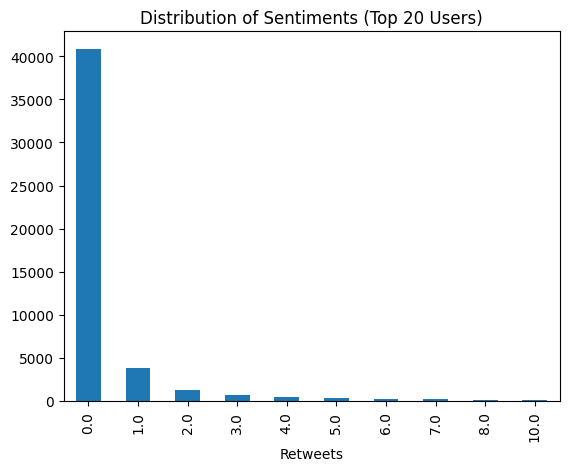

In [ ]:
#data visualization
# Get the top 20 users by count
top_users = sentiment_counts.nlargest(20)

top_users.plot(kind='bar', title='Distribution of Sentiments (Top 20 Users)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

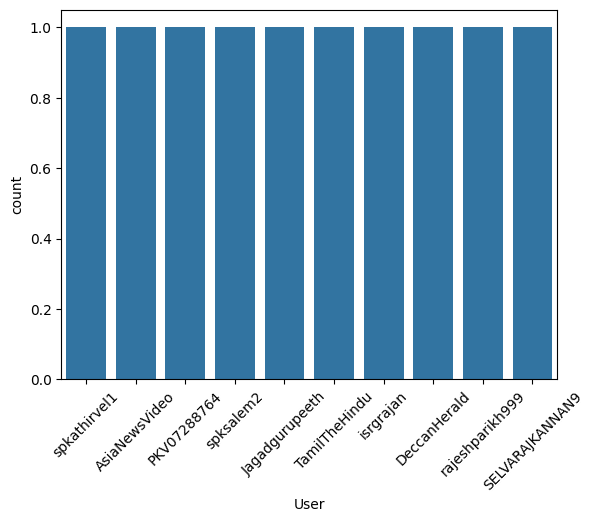

In [ ]:
import pandas as pd
import seaborn as sns

top_users_df = df.groupby('User').size().to_frame(name='count').nlargest(10, 'count')

sns.countplot(x='User', data=top_users_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
y_pred = model.predict(X_val_vectorized)

In [ ]:
cm = confusion_matrix(y_val, y_pred)

In [ ]:
# Positive Accuracy (Precision for Positive Class)
positive_accuracy = precision_score(y_val, y_pred, pos_label=1, average='weighted')

# Negative Accuracy (Precision for Negative Class)
negative_accuracy = precision_score(y_val, y_pred, pos_label=0, average='weighted')

# Positive Recall (Recall for Positive Class) - Also known as Sensitivity
positive_recall = recall_score(y_val, y_pred, pos_label=1, average='weighted')

# Negative Recall (Recall for Negative Class) - Also known as Specificity
negative_recall = recall_score(y_val, y_pred, pos_label=0, average='weighted')

print(f"Positive Accuracy: {positive_accuracy}")
print(f"Negative Accuracy: {negative_accuracy}")
print(f"Positive Recall: {positive_recall}")
print(f"Negative Recall: {negative_recall}")

Positive Accuracy: 0.7462008503401361
Negative Accuracy: 0.7462008503401361
Positive Recall: 0.8181
Negative Recall: 0.8181


In [ ]:
# Group by 'User' and sum 'Likes' to get total likes for each user
top_users = df.groupby('User')['Likes'].sum().nlargest(10).index.tolist()

# Filter the DataFrame to include only the top 10 users
top_users_df = df[df['User'].isin(top_users)]

In [ ]:
# Assuming you have 'Sentiment' as the target variable
y_true = top_users_df['Sentiment']  # True labels
y_pred = model.predict(vectorizer.transform(top_users_df['User'])) # Predicted labels

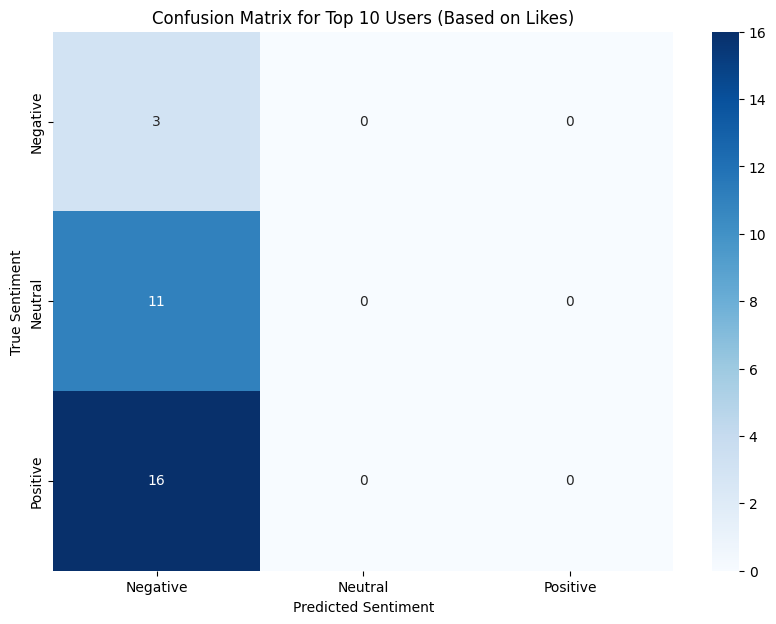

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

y_true_numeric = np.array([label_mapping[label] for label in top_users_df['Sentiment']])

# Create the confusion matrix
cm = confusion_matrix(y_true_numeric, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix for Top 10 Users (Based on Likes)')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()

In [ ]:
import pandas as pd

# Assuming your dataframe is named 'df'
sentiment_counts = df['Sentiment'].value_counts()
total_tweets = len(df)

# Create a DataFrame for the table
table_data = pd.DataFrame({
    'Sentiment Classes': sentiment_counts.index,
    'No. of tweets in each class': sentiment_counts.values,
    '% of tweets in each class': (sentiment_counts.values / total_tweets) * 100
})

In [ ]:
# Function to count tokens in a tweet
def count_tokens(tweet):
    return len(tweet.split())

# Calculate token counts for each sentiment class
table_data['No. of tokens in each class'] = table_data['Sentiment Classes'].apply(lambda sentiment: df[df['Sentiment'] == sentiment]['Tweet'].apply(count_tokens).sum())

# Calculate total tokens
total_tokens = table_data['No. of tokens in each class'].sum()

# Calculate percentage of tokens in each class
table_data['% of tokens in each class'] = (table_data['No. of tokens in each class'] / total_tokens) * 100

In [ ]:
print("Table 1. Corpus Statistics")
print(table_data)

Table 1. Corpus Statistics
  Sentiment Classes  No. of tweets in each class  % of tweets in each class  \
0          Positive                        23966                  47.932959   
1           Neutral                        13065                  26.130523   
2          Negative                        12968                  25.936519   

   No. of tokens in each class  % of tokens in each class  
0                       771478                  49.421214  
1                       371627                  23.806586  
2                       417921                  26.772200  


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return precision, recall, f1

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'df' is your DataFrame containing 'Tweet' and 'Sentiment' columns
X = df['Tweet']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Fit the vectorizer to the training data and transform it
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_vectorized = vectorizer.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train_vectorized, y_train) # Now X_train_vectorized and y_train have consistent shapes

# Make predictions on the testing data
y_pred = model.predict(X_test_vectorized)

# Calculate evaluation metrics
precision, recall, f1 = calculate_metrics(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.4720721994634973
Recall: 0.4936
F1-score: 0.44473604323166294


In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC  # Using LinearSVC for text classification
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'df' is your DataFrame containing 'Tweet' and 'Sentiment' columns
X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Representation Techniques
vectorizers = {
    'tf': CountVectorizer(max_features=5000),
    'tf-idf1': TfidfVectorizer(ngram_range=(1, 1), max_features=5000),
    'tf-idf2': TfidfVectorizer(ngram_range=(1, 2), max_features=5000),
    'tf-idf3': TfidfVectorizer(ngram_range=(1, 3), max_features=5000),
}

# Classification Models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=200),
    'SVM': LinearSVC(max_iter=10000), # Using LinearSVC
}

# Store results
results = []

# Loop through vectorizers and models
for vectorizer_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)

        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append([model_name, vectorizer_name, precision, recall, f1])

# Create DataFrame
results_df = pd.DataFrame(results, columns=['Classification Method', 'Text Representation', 'Precision', 'Recall', 'F1-Score'])

# Pivot for better readability
results_table = results_df.pivot(index='Classification Method', columns='Text Representation', values=['Precision', 'Recall', 'F1-Score'])

# Display table
print(results_table)

                      Precision                                Recall          \
Text Representation          tf   tf-idf1   tf-idf2   tf-idf3      tf tf-idf1   
Classification Method                                                           
Logistic Regression    0.438364  0.472759  0.472072  0.469974  0.4613  0.4928   
SVM                    0.432129  0.448093  0.452914  0.450963  0.4541  0.4705   

                                       F1-Score                                
Text Representation   tf-idf2 tf-idf3        tf   tf-idf1   tf-idf2   tf-idf3  
Classification Method                                                          
Logistic Regression    0.4936  0.4921  0.437169  0.444892  0.444736  0.442746  
SVM                    0.4752  0.4736  0.432803  0.446319  0.451137  0.449293  


In [ ]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame containing 'Tweet' and 'Sentiment' columns
X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TfidfVectorizer object with tf-idf3 settings
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Fit the vectorizer to the training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Classification Models and their training time calculation
classifiers = {
    'Support Vector Machines': LinearSVC(max_iter=10000),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=200),
    'Random Forest Classifier': RandomForestClassifier(),
}

training_times = {}

for classifier_name, classifier in classifiers.items():
    start_time = time.time()
    classifier.fit(X_train_vec, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    training_times[classifier_name] = training_time

# Create a DataFrame for the training times
training_times_df = pd.DataFrame(list(training_times.items()), columns=['Classifier', 'Training Time (s)'])

# Display the training times
print(training_times_df)

                 Classifier  Training Time (s)
0   Support Vector Machines           7.898587
1  Decision Tree Classifier          55.177782
2       Logistic Regression           1.641107
3  Random Forest Classifier         205.620649
